한국교통연구원,「교통접근성지표」, 2020, 2023.02.07, 의료시설 유형별 평균접근시간\
https://kosis.kr/statHtml/statHtml.do?orgId=444&tblId=DT_444001_004_A&conn_path=I2

In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
goHospital = pd.read_csv('../../Data/public health/의료시설 유형별 평균접근시간.csv', encoding='euc-kr')#, index_col='시점')
goHospital.head()

,행정구역별(1),시간대별(1),시점,공공의료시설,공공의료시설.1,병·의원,병·의원.1,종합병원,종합병원.1
0,행정구역별(1),시간대별(1),시점,승용차,대중교통/도보,승용차,대중교통/도보,승용차,대중교통/도보
1,전국,일평균(06-20시),2017,8.91,18.65,3.28,9.09,13.48,27.66
2,전국,일평균(06-20시),2018,8.70,18.61,3.24,9.04,13.11,26.64
3,전국,일평균(06-20시),2019,8.13,21.26,3.34,11.69,12.90,31.23
4,전국,일평균(06-20시),2020,8.50,17.70,3.37,8.61,12.64,24.80


In [4]:
goHospital.columns.unique()

Index(['행정구역별(1)', '시간대별(1)', '시점', '공공의료시설', '공공의료시설.1', '병·의원', '병·의원.1',
       '종합병원', '종합병원.1'],
      dtype='object')

In [5]:
goHospital.shape

(289, 9)

In [6]:
goHospital

,행정구역별(1),시간대별(1),시점,공공의료시설,공공의료시설.1,병·의원,병·의원.1,종합병원,종합병원.1
0,행정구역별(1),시간대별(1),시점,승용차,대중교통/도보,승용차,대중교통/도보,승용차,대중교통/도보
1,전국,일평균(06-20시),2017,8.91,18.65,3.28,9.09,13.48,27.66
2,전국,일평균(06-20시),2018,8.70,18.61,3.24,9.04,13.11,26.64
3,전국,일평균(06-20시),2019,8.13,21.26,3.34,11.69,12.90,31.23
4,전국,일평균(06-20시),2020,8.50,17.70,3.37,8.61,12.64,24.80
...,...,...,...,...,...,...,...,...,...
284,제주특별자치도,낮시간(12-14시),2020,9.48,21.59,4.71,10.83,19.04,30.76
285,제주특별자치도,저녁첨두(18-20시),2017,9.95,20.05,5.52,8.83,19.82,29.24
286,제주특별자치도,저녁첨두(18-20시),2018,9.19,20.61,5.02,11.19,18.41,30.11
287,제주특별자치도,저녁첨두(18-20시),2019,9.13,25.07,11.63,17.55,25.13,38.78


In [11]:
# colimn 이름 변경 
colnames = ['시도별','시간대별안써','시점','공공의료시설 승용차','공공의료시설 대중교통/도보','병.의원 승용차','병.의원 대중교통/도보','종합병원 승용차','종합병원 대중교통/도보']
goHospital.columns = colnames
goHospital = goHospital.iloc[1:,:]

In [13]:
# 불필요한 colomn 제거 
goHospital = goHospital[['시도별','시점','공공의료시설 승용차','공공의료시설 대중교통/도보','병.의원 승용차','병.의원 대중교통/도보','종합병원 승용차','종합병원 대중교통/도보']]
goHospital.head()

,시도별,시점,공공의료시설 승용차,공공의료시설 대중교통/도보,병.의원 승용차,병.의원 대중교통/도보,종합병원 승용차,종합병원 대중교통/도보
1,전국,2017,8.91,18.65,3.28,9.09,13.48,27.66
2,전국,2018,8.70,18.61,3.24,9.04,13.11,26.64
3,전국,2019,8.13,21.26,3.34,11.69,12.90,31.23
4,전국,2020,8.50,17.70,3.37,8.61,12.64,24.80
5,전국,2017,8.67,18.49,3.23,8.85,13.18,27.30


In [14]:
# index 변경 
goHospital.set_index(keys=['시점'], inplace=True, drop=True)
goHospital.head()

,시도별,공공의료시설 승용차,공공의료시설 대중교통/도보,병.의원 승용차,병.의원 대중교통/도보,종합병원 승용차,종합병원 대중교통/도보
시점,,,,,,,
2017,전국,8.91,18.65,3.28,9.09,13.48,27.66
2018,전국,8.70,18.61,3.24,9.04,13.11,26.64
2019,전국,8.13,21.26,3.34,11.69,12.90,31.23
2020,전국,8.50,17.70,3.37,8.61,12.64,24.80
2017,전국,8.67,18.49,3.23,8.85,13.18,27.30


In [15]:
goHospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 2017 to 2020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   시도별             288 non-null    object
 1   공공의료시설 승용차      288 non-null    object
 2   공공의료시설 대중교통/도보  288 non-null    object
 3   병.의원 승용차        288 non-null    object
 4   병.의원 대중교통/도보    288 non-null    object
 5   종합병원 승용차        288 non-null    object
 6   종합병원 대중교통/도보    288 non-null    object
dtypes: object(7)
memory usage: 18.0+ KB


In [18]:
# values float 변경 
goHospital.iloc[:,1:] = goHospital.iloc[:,1:].astype(float)
goHospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 2017 to 2020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도별             288 non-null    object 
 1   공공의료시설 승용차      288 non-null    float64
 2   공공의료시설 대중교통/도보  288 non-null    float64
 3   병.의원 승용차        288 non-null    float64
 4   병.의원 대중교통/도보    288 non-null    float64
 5   종합병원 승용차        288 non-null    float64
 6   종합병원 대중교통/도보    288 non-null    float64
dtypes: float64(6), object(1)
memory usage: 18.0+ KB


In [21]:
# index type int 로 변경 
goHospital.index = goHospital.index.astype(int)

In [24]:
goHospital[goHospital.index == 2019]

,시도별,공공의료시설 승용차,공공의료시설 대중교통/도보,병.의원 승용차,병.의원 대중교통/도보,종합병원 승용차,종합병원 대중교통/도보
시점,,,,,,,
2019,전국,8.13,21.26,3.34,11.69,12.90,31.23
2019,전국,7.70,19.61,3.14,9.92,12.20,27.98
2019,전국,8.12,21.29,3.26,11.57,12.74,31.27
2019,전국,8.34,27.56,4.25,21.96,14.38,45.56
2019,서울특별시,8.58,16.17,1.80,3.40,7.77,14.75
...,...,...,...,...,...,...,...
2019,경상남도,8.02,37.81,5.59,43.63,21.23,86.78
2019,제주특별자치도,9.19,23.73,5.07,11.99,18.58,33.38
2019,제주특별자치도,8.81,22.48,5.18,11.80,18.00,32.45


In [28]:
goHospital.index.unique()

Int64Index([2017, 2018, 2019, 2020], dtype='int64', name='시점')

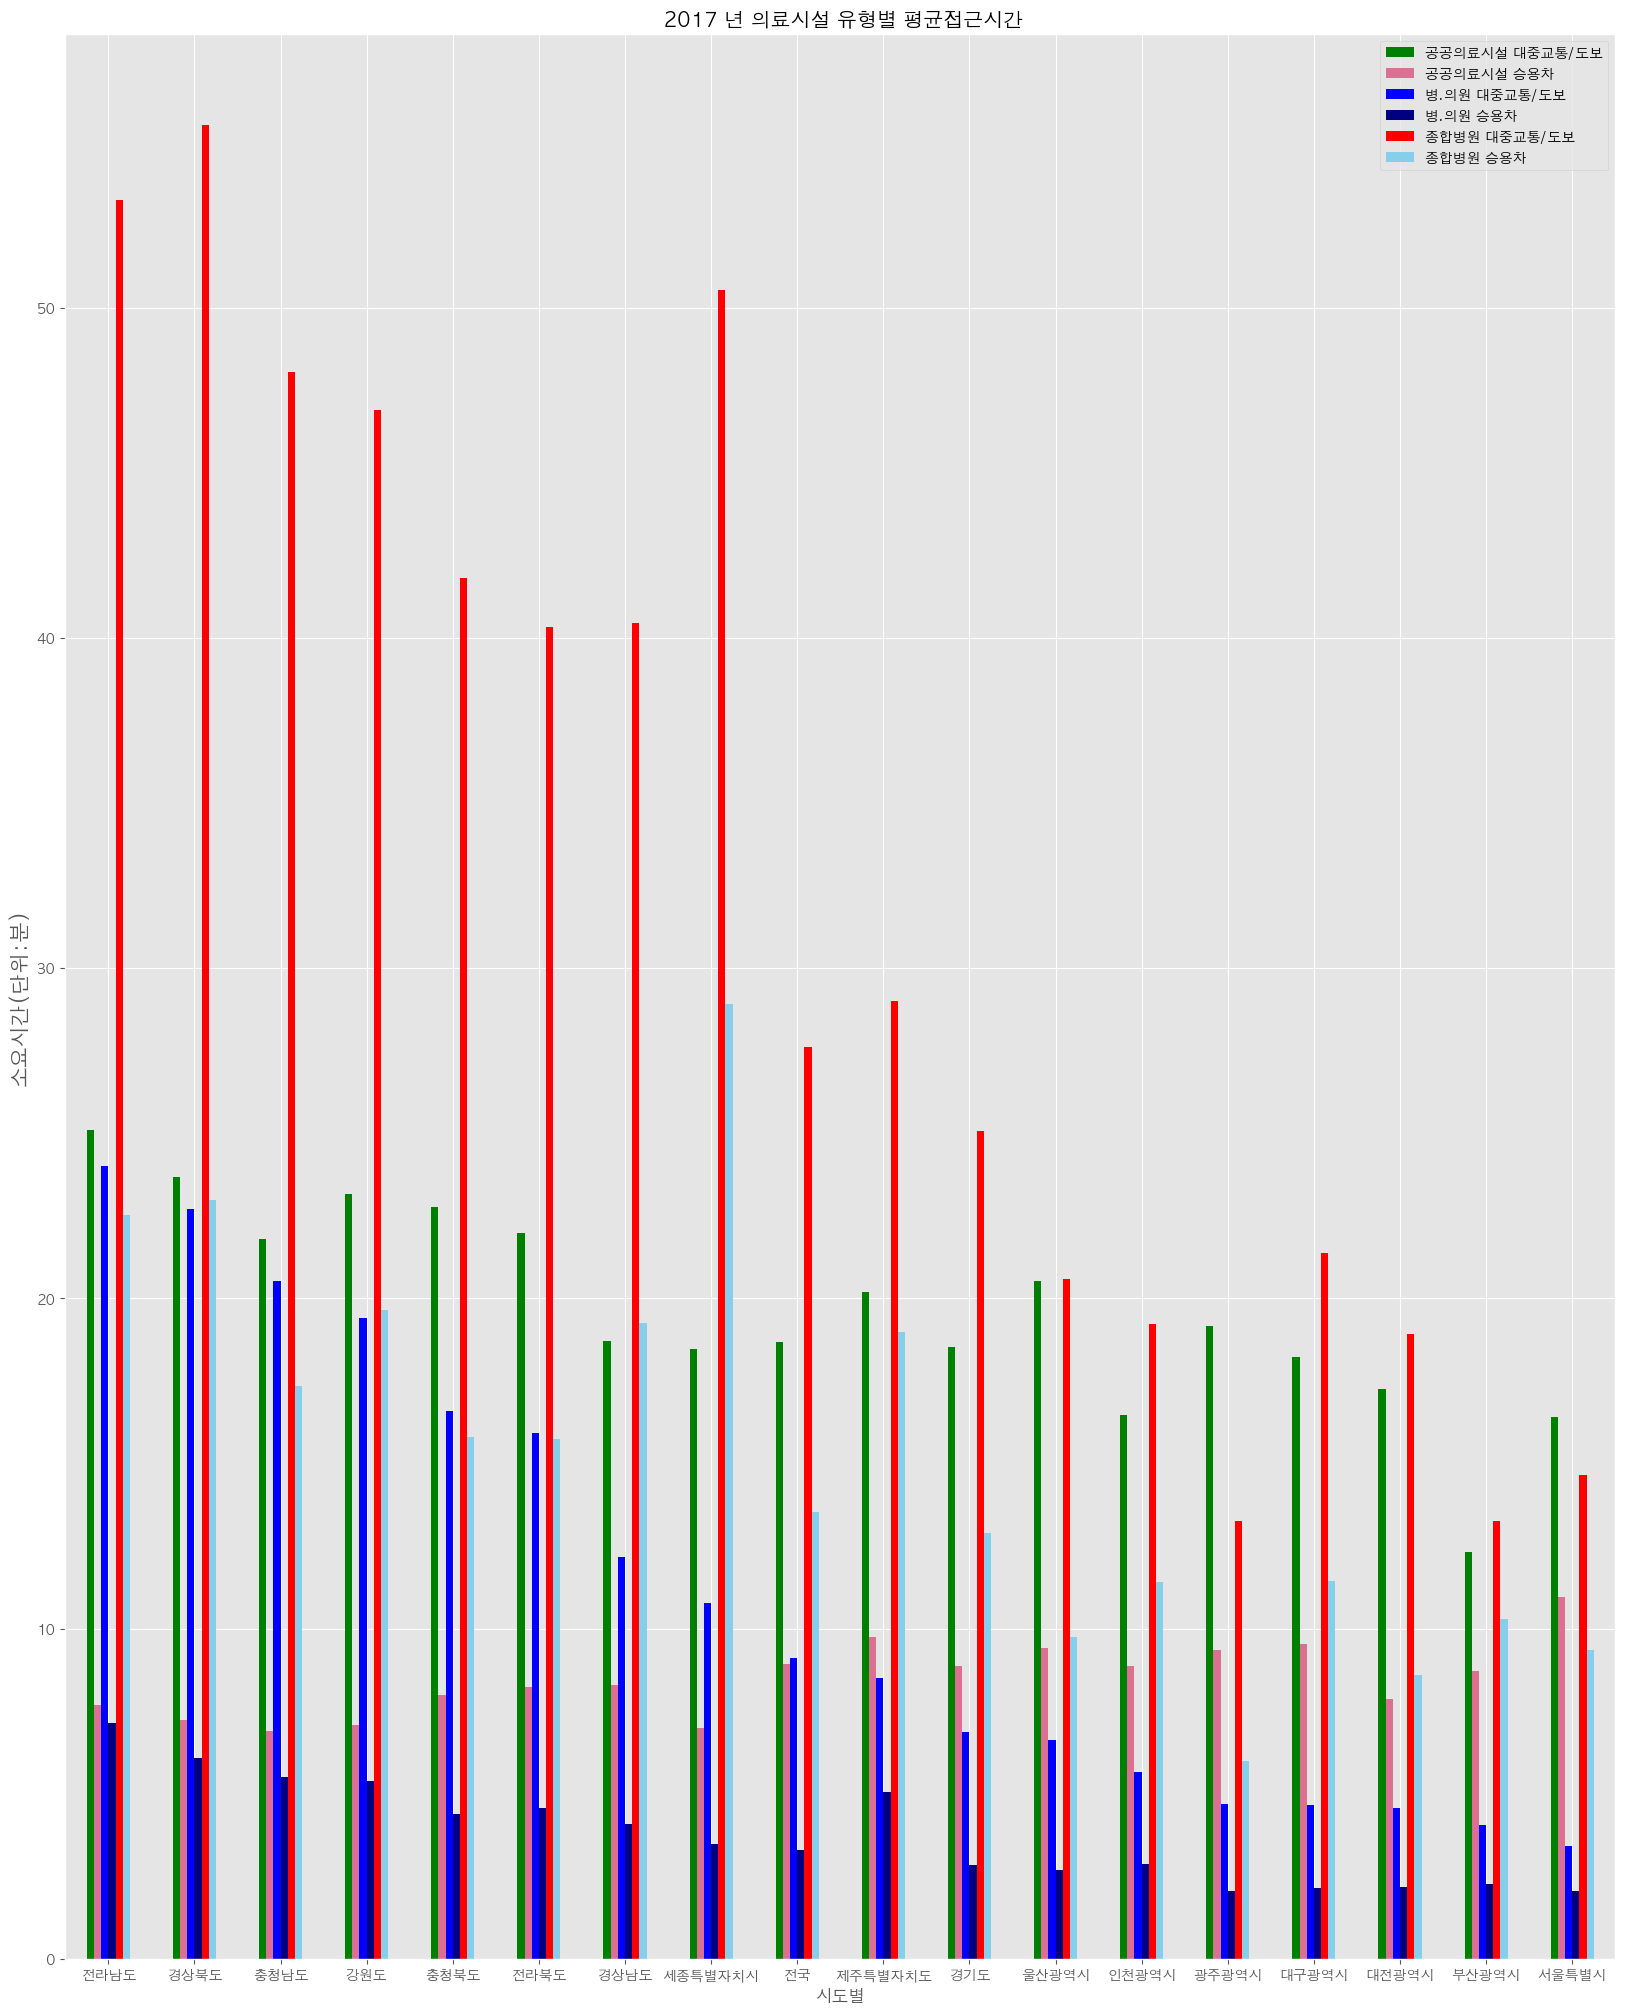

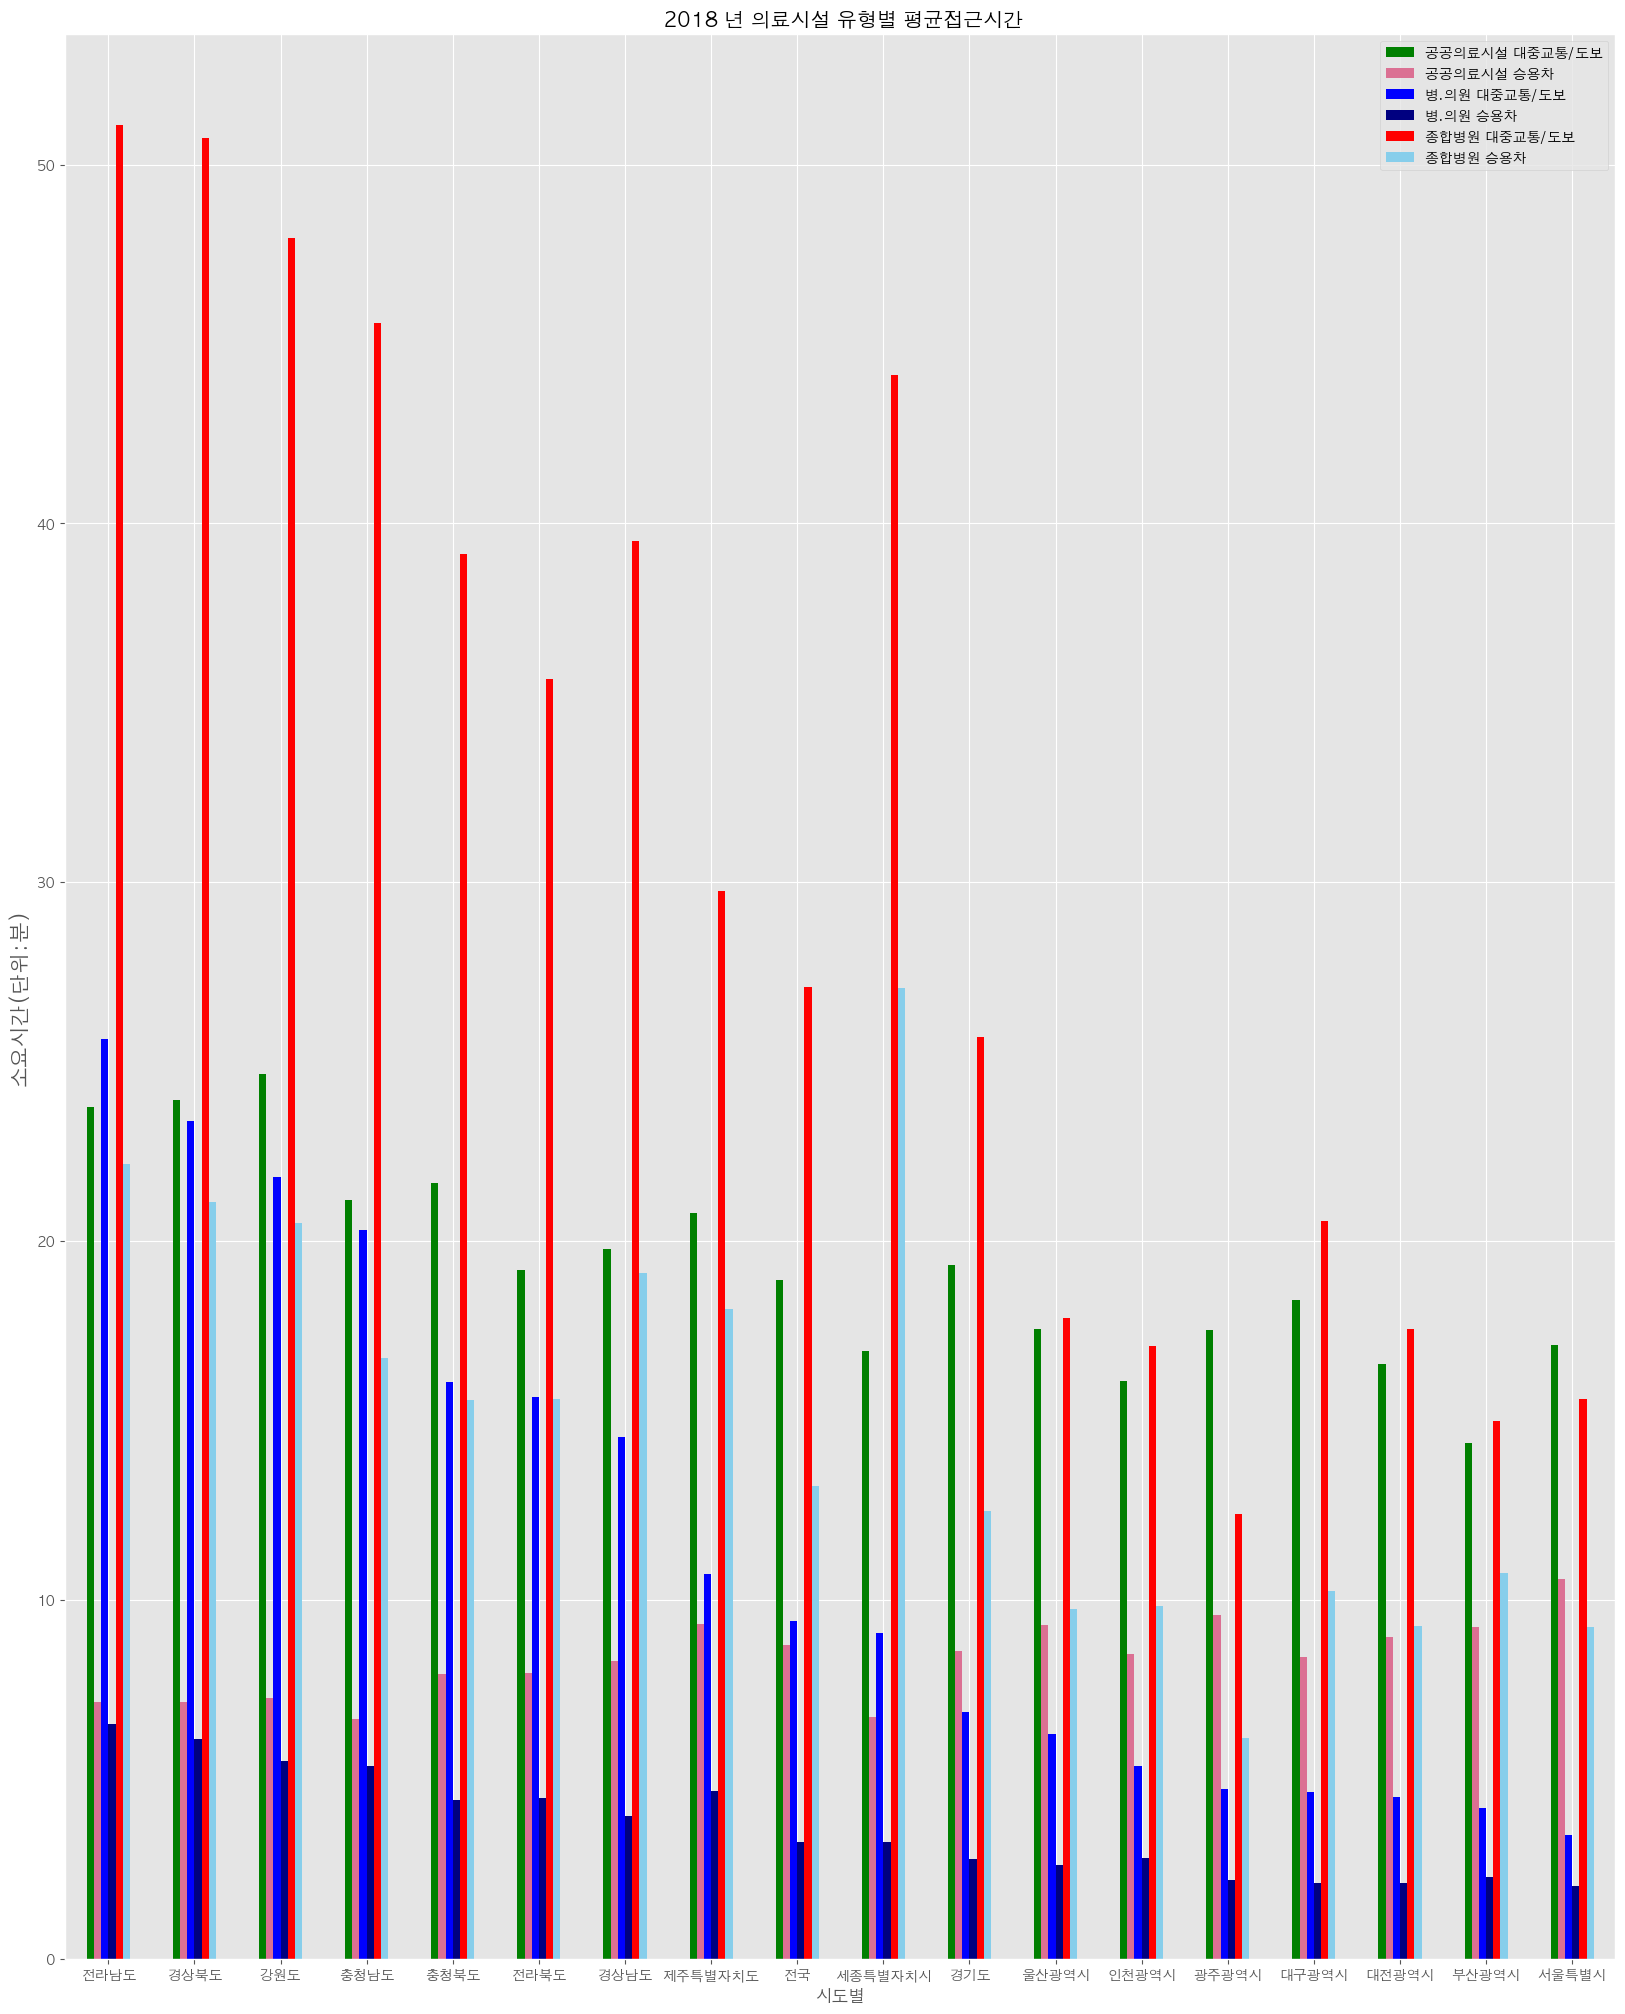

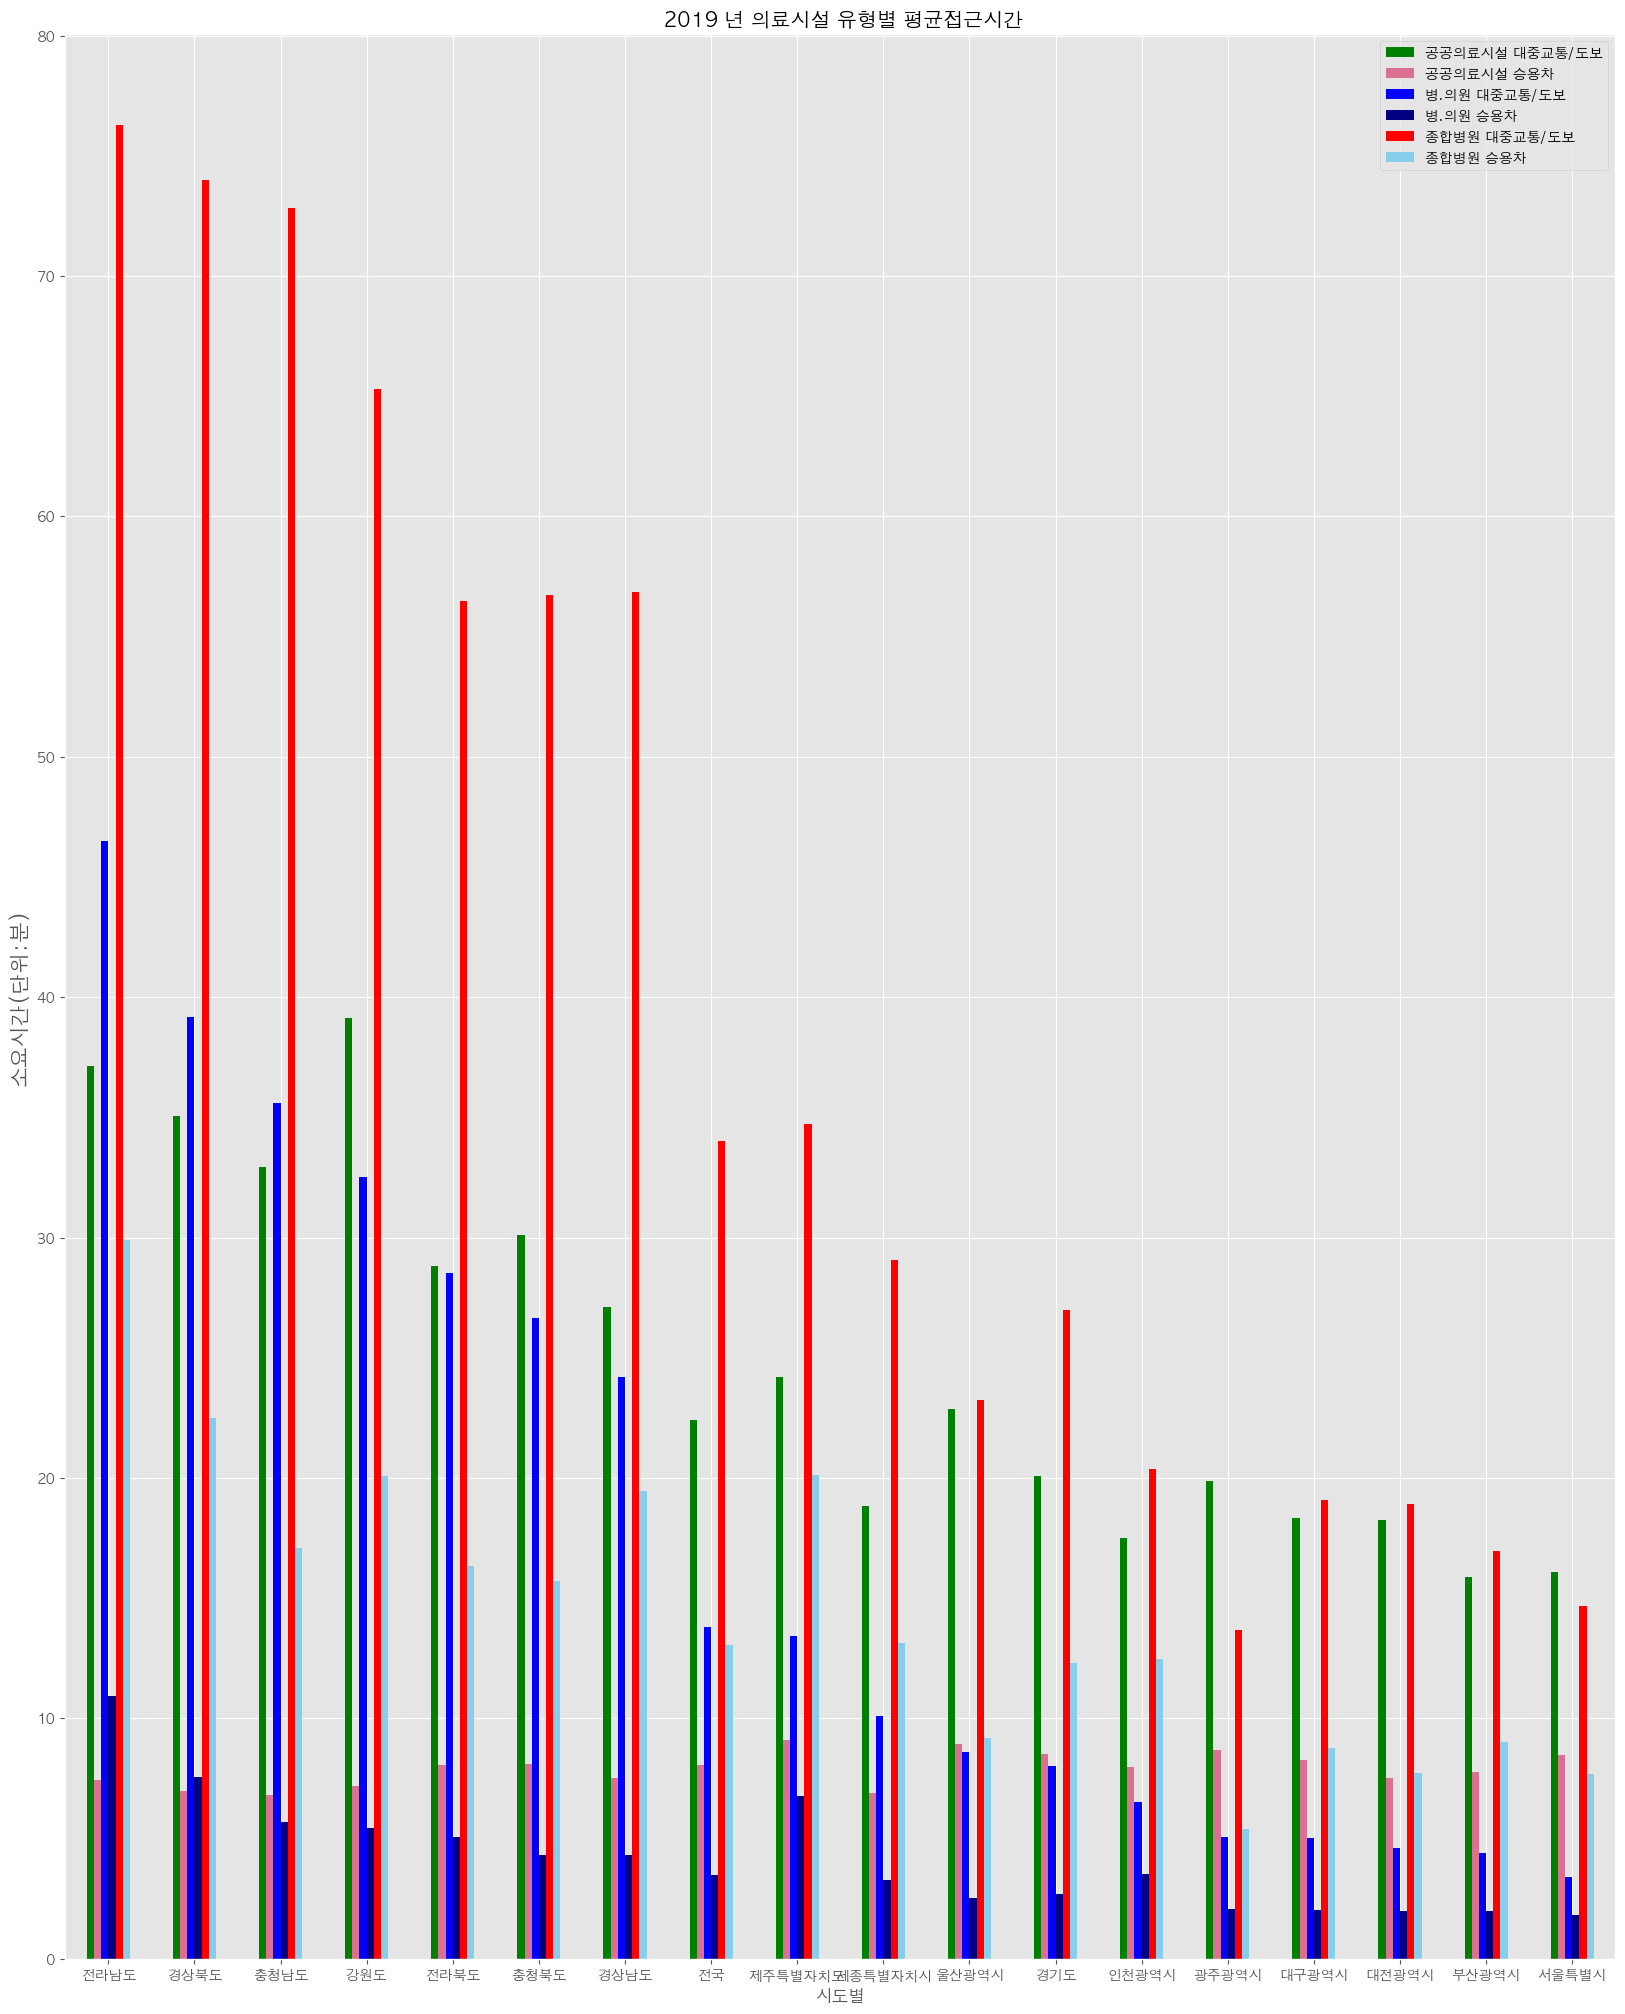

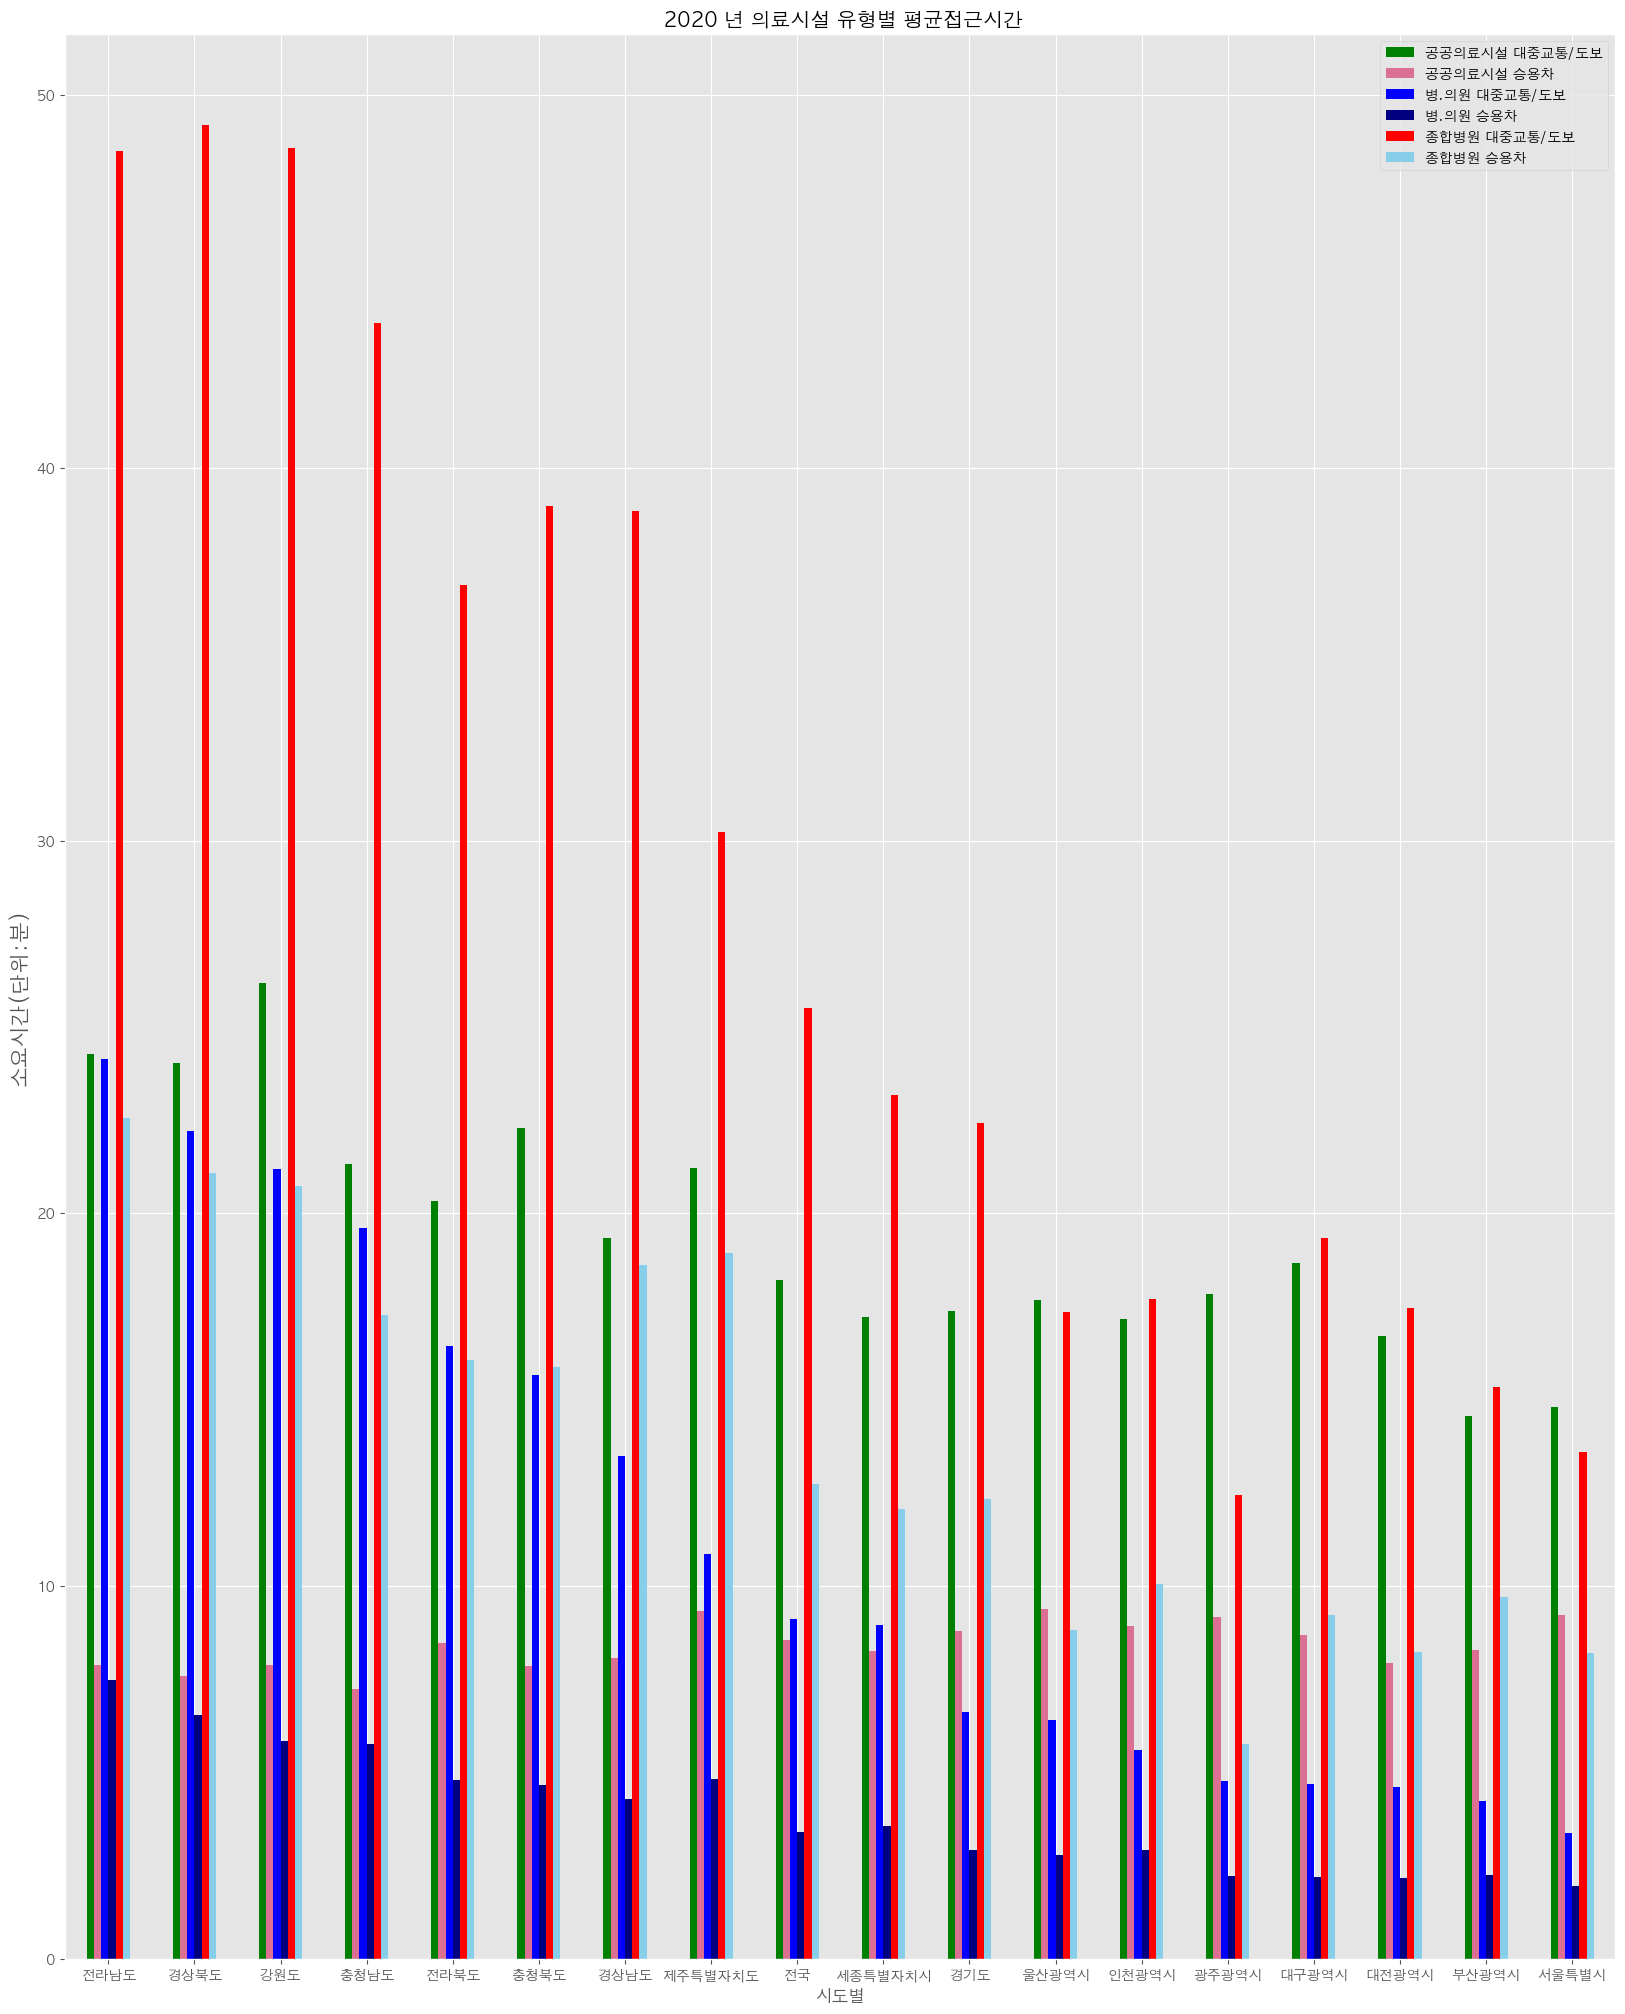

In [37]:
years = [2017, 2018, 2019, 2020]
colors = ['green','palevioletred','blue','navy','red','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
for year in years:
    titleYear = year
    goHospitalPivot = pd.pivot_table(goHospital[goHospital.index == year], index = '시도별', aggfunc = 'mean').sort_values(by='병.의원 대중교통/도보',ascending=False)
    plt.style.use('ggplot')
    goHospitalPivot.plot(
    kind='bar', 
    figsize=(20,25),
    color = colors,
    )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("소요시간(단위:분)", size=15)
    plt.title(' %d 년 의료시설 유형별 평균접근시간'%titleYear)

    plt.show()